In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
excel_file = pd.ExcelFile('P1-SuperStoreUS-2015.xlsx')
data = pd.read_excel(excel_file, 'Orders')
data1 = pd.read_excel(excel_file, 'Returns')
data2 = pd.read_excel(excel_file, 'Users')

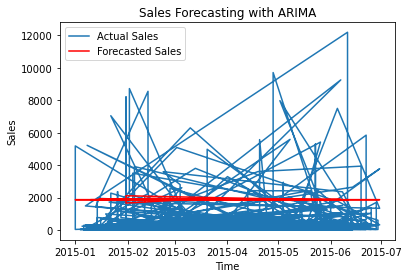

In [3]:
# Preprocessing
# Filter data for the year 2015
data['Order Date'] = pd.to_datetime(data['Order Date'])
data_2015 = data[data['Order Date'].dt.year == 2015]

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['Order Priority', 'Ship Mode', 'Customer Segment', 'Product Category']
for col in categorical_columns:
    data_2015[col] = label_encoder.fit_transform(data_2015[col])

# Split data into training and testing sets
train_size = int(len(data_2015) * 0.8)
train_data, test_data = data_2015.iloc[:train_size], data_2015.iloc[train_size:]

# Define the ARIMA model
model = ARIMA(train_data['Sales'], order=(5,1,0))  # ARIMA(p, d, q)
# Fit the model
model_fit = model.fit()

# Forecasting
forecast_length = len(test_data)
forecast = model_fit.forecast(steps=forecast_length)

# Evaluate the model
mse = mean_squared_error(test_data['Sales'], forecast)
#print("Mean Squared Error:", mse)

# Visualize the forecast
plt.plot(test_data['Order Date'], test_data['Sales'], label='Actual Sales')
plt.plot(test_data['Order Date'], forecast, color='red', label='Forecasted Sales')
plt.title('Sales Forecasting with ARIMA')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


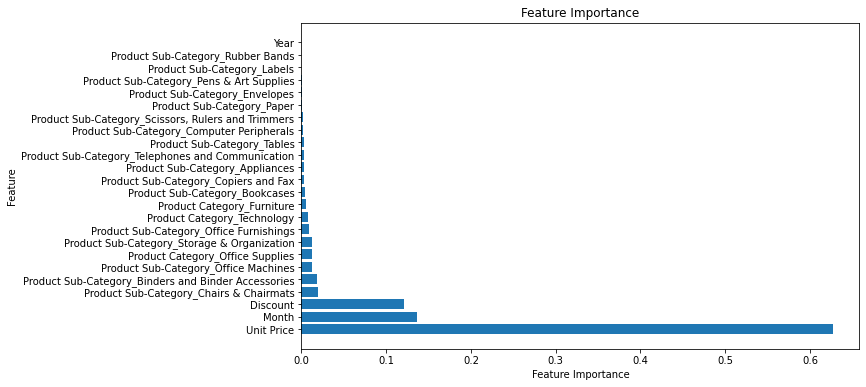

In [4]:
# Preprocessing
# Select relevant features
features = ['Product Category', 'Product Sub-Category', 'Unit Price', 'Discount', 'Sales', 'Order Date']
data = data[features]

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Product Category', 'Product Sub-Category'])

# Extract month and year from the order date
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

# Drop the original order date column
data.drop(columns=['Order Date'], inplace=True)

# Split data into features and target variable
X = data.drop(columns=['Sales'])
y = data['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict demand on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
#print("Mean Squared Error:", mse)

# Feature Importance
feature_importance = model.feature_importances_
features_list = X.columns
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_features = features_list[sorted_indices]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
